<a href="https://colab.research.google.com/github/Syilun/TibameAI04/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


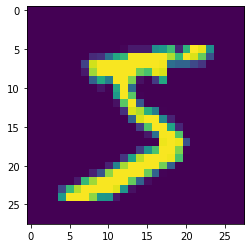

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print('ans:', y_train[idx])
plt.imshow(x_train[idx])

In [5]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [    # 784 * 128 + 128(bias) = 100480 預先搬回原點
          Dense(128, activation='relu', input_dim=784),
          # 128 * 10 + 10(bias) = 1290
          Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:

x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
x_train_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

# 梯度下降的次數 54000/200=270
# loss: cross-entropy
# val: validation
# loss, accuracy: 54000/val_loss, val_accuracy: 6000
# 看validation的loss: val_loss
# 回報函數庫: callbacks
# 在每個訓練期之後保存模型: ModelCheckpoint
# EarlyStopping: 都沒有變好就停下來。


Epoch 1/50
270/270 - 1s - loss: 0.4368 - accuracy: 0.8809 - val_loss: 0.1965 - val_accuracy: 0.9487
Epoch 2/50
270/270 - 1s - loss: 0.2066 - accuracy: 0.9416 - val_loss: 0.1456 - val_accuracy: 0.9602
Epoch 3/50
270/270 - 1s - loss: 0.1544 - accuracy: 0.9557 - val_loss: 0.1201 - val_accuracy: 0.9663
Epoch 4/50
270/270 - 1s - loss: 0.1244 - accuracy: 0.9646 - val_loss: 0.1059 - val_accuracy: 0.9720
Epoch 5/50
270/270 - 1s - loss: 0.1017 - accuracy: 0.9709 - val_loss: 0.0974 - val_accuracy: 0.9717
Epoch 6/50
270/270 - 1s - loss: 0.0859 - accuracy: 0.9755 - val_loss: 0.0870 - val_accuracy: 0.9777
Epoch 7/50
270/270 - 1s - loss: 0.0729 - accuracy: 0.9801 - val_loss: 0.0909 - val_accuracy: 0.9732
Epoch 8/50
270/270 - 1s - loss: 0.0631 - accuracy: 0.9819 - val_loss: 0.0826 - val_accuracy: 0.9770
Epoch 9/50
270/270 - 1s - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.0787 - val_accuracy: 0.9767
Epoch 10/50
270/270 - 1s - loss: 0.0481 - accuracy: 0.9865 - val_loss: 0.0795 - val_accuracy: 0.9760

In [12]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9783


[0.07695715874433517, 0.9782999753952026]

In [ ]:
# 因為loss那些已經都存好了
# 可以load已經訓練好的model